In [1]:
import astropy.units as u
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from astroduet.duet_telescope import load_qe, load_reflectivity, load_redfilter, apply_filters
from astroduet.duet_filters import optimize_filter, make_red_filter
from astroduet.apply_transmission import apply_trans
from astroduet.zodi import load_airglow, load_zodi
import astropy.units as u
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

Optics reflectivity loader
Input file /Users/meo/devel/spyder_projects/duet-astro/astroduet/data/al_mgf2_mirror_coatings.csv


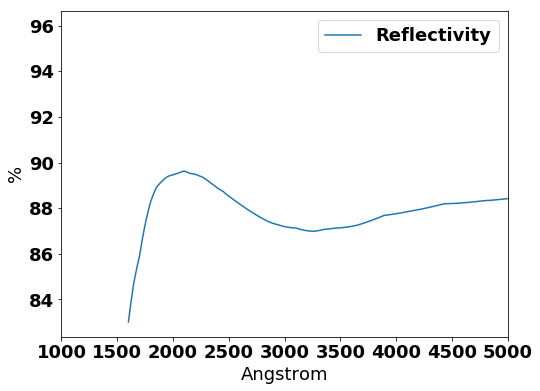

In [4]:
ref_wave, reflectivity = load_reflectivity(diag=True)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(ref_wave.to(u.AA), reflectivity, label='Reflectivity')
ax.set_xlim([1000, 5000])
ax.set_ylabel('%')
ax.legend()
ax.set_xlabel('Angstrom')

plt.show()



Average in-band transmission: 0.592534717948718
Average in-band QE: 0.5953104615384616
Average in-band transmission: 0.592534717948718


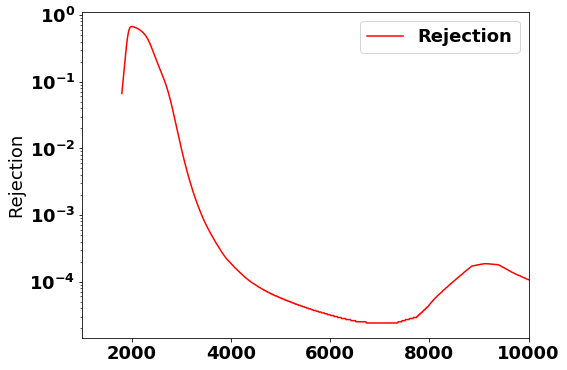

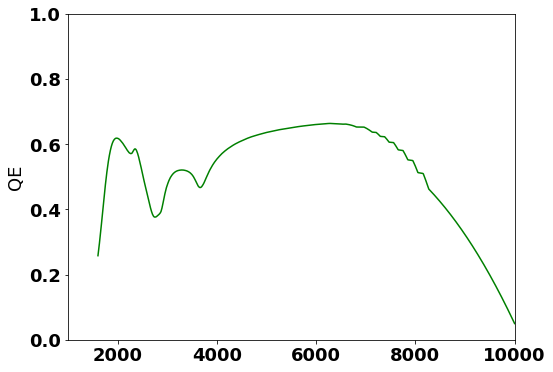

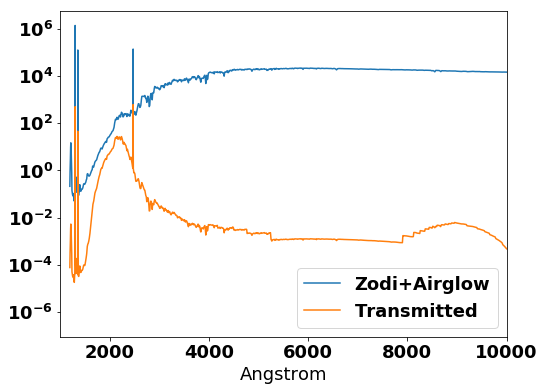

In [5]:
# Band 1
zodi = load_zodi(scale=77)

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=1, light=False)
low_wave = 193*u.nm
high_wave = 233*u.nm
qe_wave, qe = load_qe(band=1)

red_wave, red_trans = load_redfilter(band=1)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
#print(out_of_band / in_band)


fig = plt.figure(figsize = (8, 6))


ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])

ax.set_yscale('Log')



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))

red_wave, red_trans = load_redfilter(band=1, light=True)
in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))







#ax.plot(red_wave.to(u.AA), red_trans, color = 'red',linestyle='--', label='Rejection, Light')

ax.legend()
fig = plt.figure(figsize = (8, 6))


ax2 = fig.subplots()


#ax2 = ax.twinx()

ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])




ax2.set_ylabel('QE')




# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc=0)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

plt.show()


Average in-band transmission: 0.5063422564102563
Average in-band QE: 0.7426032051282051
Average in-band transmission: 0.5063422564102563


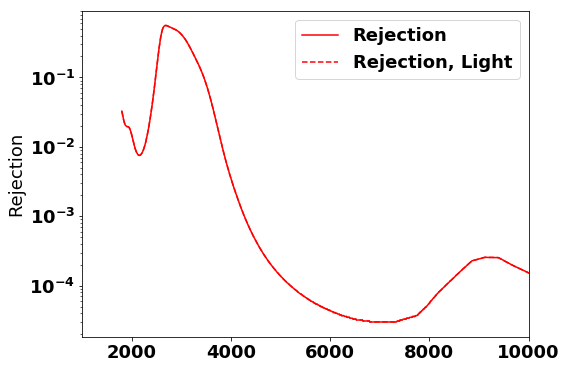

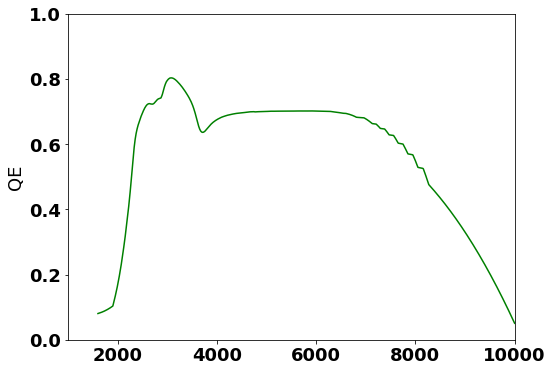

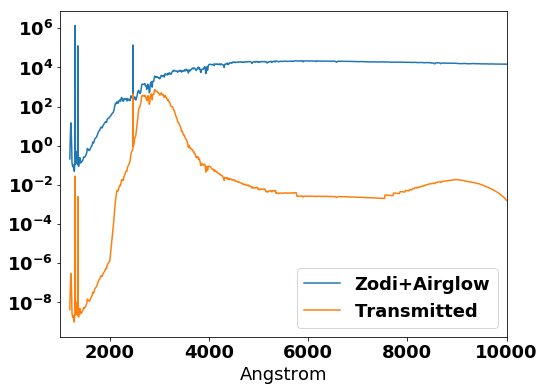

In [6]:

band_flux = apply_filters(zodi['wavelength'], zodi['flux'], band=2, light=False)
#ref_wave, reflectivity = load_reflectivity()
low_wave = 260*u.nm
high_wave = 300*u.nm
qe_wave, qe = load_qe(band=2)

red_wave, red_trans = load_redfilter(band=2)

in_band = band_flux[(zodi['wavelength'] > low_wave) &
                   (zodi['wavelength']<high_wave)].sum()

out_of_band = band_flux[((zodi['wavelength'] < low_wave) |
                        (zodi['wavelength']>high_wave)) & 
                       (zodi['wavelength'] < 1*u.micron)].sum()
#print(out_of_band / in_band)


fig = plt.figure(figsize = (8, 6))


ax = fig.subplots()
ax.set_ylabel('Rejection')
ax.plot(red_wave.to(u.AA), red_trans, color = 'red', label='Rejection')
ax.set_xlim([1000, 10000])

ax.set_yscale('Log')



in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
in_band_qe = qe[(qe_wave > low_wave) & (qe_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))
print('Average in-band QE: {}'.format(in_band_qe))

red_wave, red_trans = load_redfilter(band=2, light=True)
in_band_trans = red_trans[(red_wave > low_wave) & (red_wave < high_wave)].mean()
print('Average in-band transmission: {}'.format(in_band_trans))

ax.plot(red_wave.to(u.AA), red_trans, color = 'red',linestyle='--', label='Rejection, Light')

ax.legend()
fig = plt.figure(figsize = (8, 6))


ax2 = fig.subplots()


#ax2 = ax.twinx()

ax2.plot(qe_wave.to(u.AA), qe, color = 'green', label="QE")
ax2.set_ylim([0, 1])
ax2.set_xlim([1000, 10000])




ax2.set_ylabel('QE')


fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()


ax.plot(zodi['wavelength'], zodi['flux'], label='Zodi+Airglow')
ax.plot(zodi['wavelength'], band_flux, label='Transmitted')
ax.set_yscale('Log')
ax.set_xlim([1000, 10000])
ax.legend()
ax.set_xlabel('Angstrom')

# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc=0)


plt.show()



Band1: 292.00 nm λ_eff, 68.16 nm W_eff
Band2: 220.31 nm λ_eff, 53.33 nm W_eff


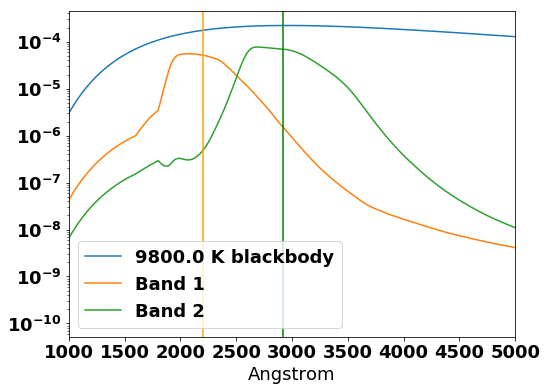

In [7]:
# Use T=9.8e3 K (Vega) to compute "effective lambda":

from astropy.modeling import models
from astropy.modeling.blackbody import FLAM

temp = 9.8e3*u.K
bb = models.BlackBody1D(temperature=temp)
wave = np.arange(1000, 10000)*u.AA
flux = bb(wave).to(FLAM, u.spectral_density(wave))

band1 = apply_filters(wave, flux, band=1)
band2 = apply_filters(wave, flux, band=2)

fig = plt.figure(figsize = (8, 6))
ax = fig.subplots()
ax.plot(wave, flux, label='{} blackbody'.format(temp))
ax.plot(wave, band1, label='Band 1')
ax.plot(wave, band2, label='Band 2')
ax.set_yscale('Log')
ax.set_xlim([1000, 5000])
ax.legend()
ax.set_xlabel('Angstrom')


λ_eff1 = ((band1*wave).sum() / (band1.sum())).to(u.nm)
λ_eff2 = ((band2*wave).sum() / (band2.sum())).to(u.nm)

ax.axvline(λ_eff1.to(u.AA).value, color ='orange')
ax.axvline(λ_eff2.to(u.AA).value, color = 'green')

dλ = wave[1] - wave[0]
t1 = band1 / flux
t2 = band2 / flux

w1 = (dλ * t1.sum() / t1.max()).to(u.nm)
w2 = (dλ * t2.sum() / t2.max()).to(u.nm)

print('Band1: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff2, w2))
print('Band2: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff1, w1))




plt.show()




Band1: 283.73 nm λ_eff, 68.16 nm W_eff
Band2: 208.96 nm λ_eff, 53.33 nm W_eff


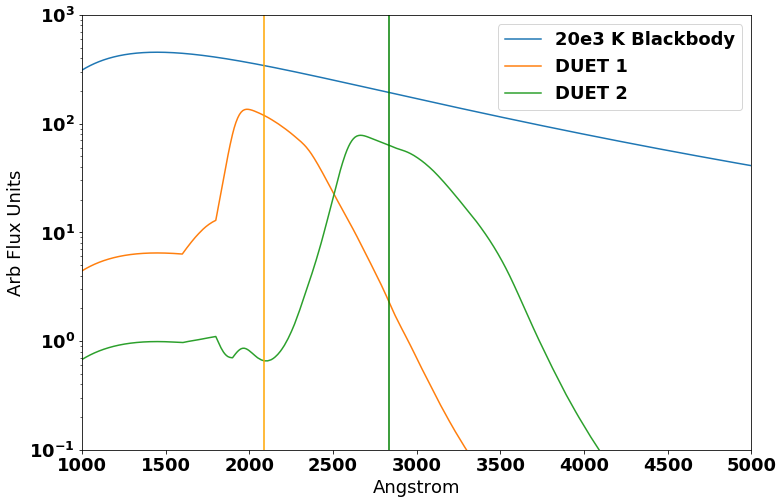

In [8]:
# Use T=20e3 K to compute "effective lambda":

from astropy.modeling import models
from astropy.modeling.blackbody import FLAM

temp = 20e3*u.K
bb = models.BlackBody1D(temperature=temp)
wave = np.arange(1000, 10000)*u.AA
flux = bb(wave).to(FLAM, u.spectral_density(wave))

band1 = apply_filters(wave, flux, band=1)
band2 = apply_filters(wave, flux, band=2)


fig = plt.figure(figsize = (12, 8))
ax = fig.subplots()

ax.plot(wave, flux*1e6, label='20e3 K Blackbody'.format(temp))
ax.plot(wave, band1*1e6, label='DUET 1')
ax.plot(wave, band2*1e6, label='DUET 2')

ax.set_yscale('Log')
ax.set_xlim([1000, 5000])
ax.set_ylim([1e-1, 1e3])


ax.legend()
ax.set_xlabel('Angstrom')
ax.set_ylabel('Arb Flux Units')



λ_eff1 = ((band1*wave).sum() / (band1.sum())).to(u.nm)
λ_eff2 = ((band2*wave).sum() / (band2.sum())).to(u.nm)

ax.axvline(λ_eff1.to(u.AA).value, color ='orange')
ax.axvline(λ_eff2.to(u.AA).value, color = 'green')

dλ = wave[1] - wave[0]
t1 = band1 / flux
t2 = band2 / flux

w1 = (dλ * t1.sum() / t1.max()).to(u.nm)
w2 = (dλ * t2.sum() / t2.max()).to(u.nm)

print('Band1: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff2, w2))
print('Band2: {0:0.2f} λ_eff, {1:0.2f} W_eff'.format(λ_eff1, w1))



plt.show()